## Predictive Irrigation: Intelligent Irrigation Machine Project - Iwas Iwas

**Motivation:**

Today, climate change is a big problem for a farm. The crops in some regions are threatened, if not destroyed due to heat and drought. If it does not rain enough, watering the fields is often a necessity. The motivation behind this project is to use deep learning to build an intelligent irrigation machine to irrigate the fields of a farm in a more precise and targeted manner by predicting the probability of a parcel having enough water or not. By doing this, we can predictively irrigate the parcels/fields and tackle the heat and drought problem.

<img src="Data/irrigation.jpg"/>

A farm has an array of 20 sensors distributed over 3 cropped fields/parcels (e.g. carrots, tomatoes). The sensors measure data like the humidity of the soil and radiation of the sun. The goal is to predict the need for water for the parcels.

This is a multi-label classification problem. In a multi-label classification problem, each observation of the 20 sensors can be labeled with zero or more classes. So classes are not mutually exclusive. In this project, I will build a Neural Network Model with a Sequential API as architecture, using Keras.

Let's start by importing the data that consists of the sensor observations and whether a parcel is irrigated in a given sensor observation. Then I'll define the predictors and the target values and perform a train-test-split.

In [112]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('Data/parcel.csv', delimiter=';')
df = df.drop('Unnamed: 0', axis=1)

X = df.drop(['parcel_0', 'parcel_1', 'parcel_2'], axis=1)
y = df[['parcel_0', 'parcel_1', 'parcel_2']]

df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
sensor_0     2000 non-null float64
sensor_1     2000 non-null float64
sensor_2     2000 non-null float64
sensor_3     2000 non-null float64
sensor_4     2000 non-null float64
sensor_5     2000 non-null float64
sensor_6     2000 non-null float64
sensor_7     2000 non-null float64
sensor_8     2000 non-null float64
sensor_9     2000 non-null float64
sensor_10    2000 non-null float64
sensor_11    2000 non-null float64
sensor_12    2000 non-null float64
sensor_13    2000 non-null float64
sensor_14    2000 non-null float64
sensor_15    2000 non-null float64
sensor_16    2000 non-null float64
sensor_17    2000 non-null float64
sensor_18    2000 non-null float64
sensor_19    2000 non-null float64
parcel_0     2000 non-null int64
parcel_1     2000 non-null int64
parcel_2     2000 non-null int64
dtypes: float64(20), int64(3)
memory usage: 359.5 KB


In [3]:
df.describe().head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,1.901000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,1.518668,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)
n_predictors = X.shape[1] #20 sensors, so that input observations of (*, 20) are allowed
n_targets = y.shape[1] #3 parcles that will be the neurons in the output layer

## A Beginning: Building first simple model

The target data (parcels) is already one-hot-encoded so that each parcel will have its output neuron in the model. Also, there is not much noise in the data and all sensor data are on the same scale. Due to that, I decided to not normalize the input data. Also, all the features already have the correct data-types, which makes further feature engineering unnecessary.

Because this is a multi-label classification problem I will use *Sigmoid* as the activation function for the output layer, so that each output-neuron gets a value between 0 and 1 and thus can be rounded to 0 or 1 depending on if the value is above or below the threshold. As each output-neuron can be on or off, the correct loss to choose to optimize is *binary crossentropy*.

Given that our input-data is not huge, I will start with a simple model architecture.

Let's now build a simple model. Later on, I will experiment with different architectures and hyperparameters to determine the best model!

In [11]:
from keras.models import Sequential
from keras.layers import Dense


model = Sequential()
#input layer and first hidden layer
model.add(Dense(64, activation='relu', input_shape=(n_predictors,))) 
model.add(Dense(n_targets, activation='sigmoid'))
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5_input (InputLayer)   (None, 20)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1344      
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 195       
Total params: 1,539
Trainable params: 1,539
Non-trainable params: 0
_________________________________________________________________


**Model Summary Explained**

<img src="Data/irrig_model.png"/>

In [6]:
#Code for image above
from keras.utils import plot_model
plot_model(model, show_shapes=True, to_file='irrig_model.png')

1.539 weights will be trained when fitting the model. The first hidden layer consists of 64 Neurons, which means that each of the 20 Neurons in the Input layer will have a weight connection to each neuron in the first hidden layer. Additionaly, each neuron, except in the input-layer has a own bias-weight connection. The output of the first hidden layer is the input for the output layer.

Hidden Layer: 20 Input-Neurons * 64 Neurons in Layer + 64 bias-weight-connections = 1344 trainable weights

Output Layer: 64 Input Neurons * 3 Neurons in Layer + 3 bias-weight-connections = 195 trainable weights

Total trainable weights/parameters = 1344 HL1 + 195 Output Layer = 1.539

I will create a function that creates our model to play around with it in the optimization process more easily.

In [3]:
def get_model(n_pred, n_targ):

    model = Sequential()
    #input layer and first hidden layer
    model.add(Dense(64, activation='relu', input_shape=(n_pred,)))
    #output layer
    model.add(Dense(n_targ, activation='sigmoid'))
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
    return model

**Fit and Evaluate first model**

Let's plot a learning curve that shows how the Accuracy of our training and validation date changes with different Epochs to check how the model performs and if we are overfitting.

In [54]:
hist = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=False)

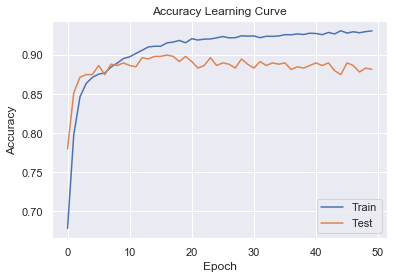

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

acc = hist.history['acc']
val_acc = hist.history['val_acc']

def plot_accuracy(acc, val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Accuracy Learning Curve')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'])
    plt.show()
plot_accuracy(acc, val_acc)

The validation Accuracy is between 0.85 and 0.90 after the model updated the weights for the first few Epochs, pretty good! Also, it looks like the validation curve has reached it's learning limit with the given input data. 

As you can see, after around Epoch 18 the validation accuracy stops increasing while the train accuracy still goes up a little. This could be a indicator for overfitting. To ensure this assumption and tackle overfitting, let's add a EarlyStopping callback and increase the number of Epochs to have a more stable result.

EarlyStopping stops the training (Forward/Backpropagation cycle) when the monitored quantity (Accuracy in this case) stopped improving for 5 Epochs. 

In [8]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Dense

model_callback = get_model(n_predictors, n_targets)

early_stopping = EarlyStopping(monitor='val_acc', patience=3)

hist = model_callback.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test),
                callbacks=[early_stopping])

Train on 1400 samples, validate on 600 samples
Epoch 1/200
1400/1400 [==============================] - 1s 571us/step - loss: 0.5910 - acc: 0.7250 - val_loss: 0.4620 - val_acc: 0.7867
Epoch 2/200
1400/1400 [==============================] - 0s 54us/step - loss: 0.4180 - acc: 0.8071 - val_loss: 0.3791 - val_acc: 0.8406
Epoch 3/200
1400/1400 [==============================] - 0s 54us/step - loss: 0.3573 - acc: 0.8410 - val_loss: 0.3425 - val_acc: 0.8528
Epoch 4/200
1400/1400 [==============================] - 0s 53us/step - loss: 0.3283 - acc: 0.8569 - val_loss: 0.3236 - val_acc: 0.8639
Epoch 5/200
1400/1400 [==============================] - 0s 54us/step - loss: 0.3133 - acc: 0.8636 - val_loss: 0.3132 - val_acc: 0.8644
Epoch 6/200
1400/1400 [==============================] - 0s 54us/step - loss: 0.3005 - acc: 0.8671 - val_loss: 0.3006 - val_acc: 0.8706
Epoch 7/200
1400/1400 [==============================] - 0s 53us/step - loss: 0.2910 - acc: 0.8752 - val_loss: 0.2923 - val_acc: 0.8711


In [9]:
accuracy = model_callback.evaluate(X_test, y_test)[1]
print('Accuracy: ', accuracy)

600/600 [==============================] - 0s 25us/step
Accuracy:  0.8977777870496114


The assumption that we don't need any more Epochs seems to be correct, as the model did not improve after reaching around 0.9067 Accuracy in the 19th Epoch.

## Optimization - Can we increase the performance?

**Do we need more data?**

We already know that given our current architecture and data, more Epochs won't help to increase the score. What about more data?

Let's plot a learning curve that shows different training sample sizes as a function of Accuracy. By storing the initial weights of the model and setting them before each training iteration with the new split, I can ensure that each iteration trains based on the same weights.

In [13]:
#Store initial model weights
initial_weights = model.get_weights()

#Lists that store accuracies
train_accs = []
test_accs = []

split_sizes = [0.3,0.25,0.2,0.15,0.1]
training_samples = [int(len(X) - (len(X) * split)) for split in split_sizes]

for split_size in split_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=split_size)
    #set model initial weights
    model.set_weights(initial_weights)
    #fit model on new split
    model.fit(X_train, y_train, epochs=200, verbose=0,callbacks=[early_stopping])
    train_acc = model.evaluate(X_train, y_train, verbose=0)[1]
    train_accs.append(train_acc)
    test_acc = model.evaluate(X_test, y_test, verbose=0)[1]
    test_accs.append(test_acc)

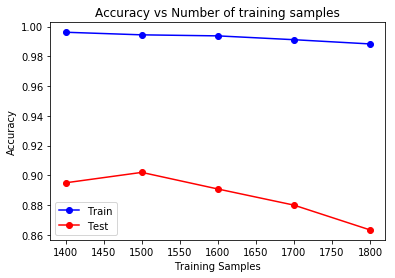

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(training_samples, train_accs, '-o', c='blue')
plt.plot(training_samples, test_accs, '-o', c='red')
plt.xlabel('Training Samples')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.title('Accuracy vs Number of training samples')
plt.show()

Interesting results. The training the data with more than 1500 observations from the sensors shows a downwards trend, which suggests that more data won't increase the performance of the model. One step could be to collect more data or create bootstrap samples and repeat the performance evaluation on those.

For now, I am going to stick with the 1.400 samples (70% training, 30% test). 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.30)

**Which activation function to use for the Hidden Layer?**

When it comes to the activation function, there is no magic formula to choose the right one. It depends on the problem and the goal to achieve in a given layer. For example, I did choose the sigmoid activation function for the output layer because we have a multi-label classification problem. Relu's are a good first choice, as we saw in the evaluation, but let's find out how our model performs with other activation functions for the hidden layers.

Let's start by setting a random seed so that the models I am going to compare are initialized with the same weights. This is necessary to get a reliable performance result. After that, I am going to create a function to create models that receive the activation function as input. Finally, I am going to iterate over different activation functions for the hidden layer, fit a model to each of them and create a data frame with the results.

In [15]:
np.random.seed(1)

#function that returns a new model with the given activation function
def get_model(activation_function):
    model = Sequential()
    model.add(Dense(64, activation=activation_function, input_shape=(n_predictors,)))
    model.add(Dense(3, activation='sigmoid'))
    
    model.compile(optimizer='adam',
                 loss='binary_crossentropy',
                 metrics=['accuracy'])
    
   
    return model

activations = ['relu', 'sigmoid', 'tanh']
act_results = {}

for activation in activations:
    model = get_model(activation)
    hist = model.fit(X_train, y_train,
                    epochs=20, verbose=0,
                    validation_data=(X_test,y_test))
    
    #create dict. entrys with fit history for each
    #activation function iteration w/ function name as key and history as value
    act_results[activation] = hist
        
from keras.layers import LeakyReLU
model = Sequential()
model.add(Dense(64, input_shape=(20,)))
model.add(LeakyReLU()) #outputs of first HL will be input to leakyrelu layer/activation 
model.add(Dense(3, activation='sigmoid')) #get's the output of the leakyrelu layer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, 
                        epochs=20, verbose = 0,
                    validation_data=(X_test, y_test))
act_results['leaky_relu'] = history

In [16]:
#for each key/act.function, get the val_loss and acc history

val_loss = {k:v.history['val_loss'] for k, v in act_results.items()}
val_acc = {k:v.history['val_acc'] for k,v in act_results.items()}

df_val_acc = pd.DataFrame(val_acc)
df_val_loss = pd.DataFrame(val_loss)
df_val_acc.head()

,relu,sigmoid,tanh,leaky_relu
0,0.745000,0.731667,0.782222,0.808333
1,0.822222,0.781111,0.806667,0.857778
2,0.850556,0.804444,0.827222,0.867778
3,0.858333,0.831111,0.853333,0.875556
4,0.863889,0.840000,0.862222,0.876111


Having created the data frame, I can now easily access and plot the training history. Let's plot two learning curves that show the development of the validation accuracy and validation loss for each activation function over all Epochs.

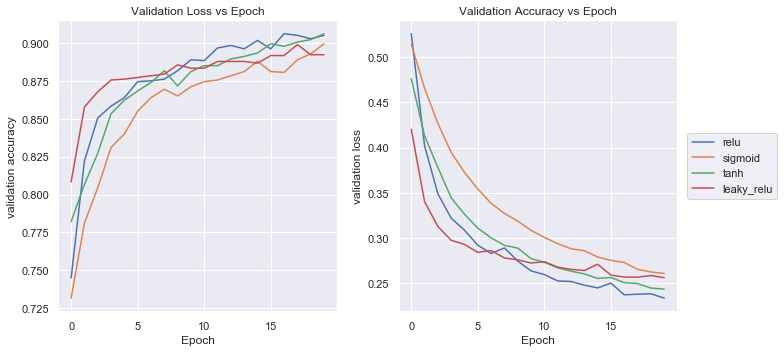

In [17]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(11,5))
_ = df_val_acc.plot(ax=ax1, legend=None)
ax1.set_xlabel('Epoch')
ax2.set_xlabel('Epoch')
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_title('Validation Accuracy vs Epoch')
ax1.set_title('Validation Loss vs Epoch')
_2 = df_val_loss.plot(ax=ax2)
_2 = plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center', ncol=1) #moves legend outside of graphic
plt.tight_layout()

As you can see, the relu activation was a good choice, as it performs the best out of the 4 activation functions I tried for the given Epochs. It has the highest overall validation accuracy and therefore lowest validation loss (binary crossentropy), because the Error (y_true - y_pred) is the lowest.

In [17]:
print('Current Testset-Accuracy: ', accuracy)

Current Testset-Accuracy:  0.8977777870496114


**Does Batch Normalization improve the performance?**

Batch Normalization can tackle the covariate shift problem. Covariate shift refers to the change in the distribution of the input values to a learning algorithm. For example, if during the training process, a weight becomes significantly larger than the others the output node will also be larger. This larger neuron output can cascade through the network and lead to the exploding gradients problem. On the flip side, the same can happen the other way around and lead to the vanishing gradients problem.

The basic idea behind batch normalization is to limit covariate shift by normalizing the output of an activation function to allow the next layer to learn on a more stable distribution of inputs, and would thus accelerate the training of the network. 

But transforming the outputs of the activation to be strictly 0 mean and unit variance can limit the expressive power of the network. Therefore, in practice, batch normalization allows the network to learn parameters gamma and beta that can convert the mean and variance to any value that the network desires within the training process.

                                       1. Normalize output from activation function

$$ z = \frac{x - m}{s} $$

                                       2. Multiply normalized output with gamma
                                
$$ z * g $$

                                       3. Add parameter beta to resuting product
                                
$$ (z*g) + b $$                

In [21]:
from keras.layers import BatchNormalization

batchnorm_model = Sequential()
batchnorm_model.add(Dense(64, activation='relu', input_shape=(n_predictors,)))
batchnorm_model.add(BatchNormalization())
batchnorm_model.add(Dense(3, activation='sigmoid'))
batchnorm_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [22]:
normal_model = Sequential()
normal_model.add(Dense(64, activation='relu', input_shape=(n_predictors,)))
normal_model.add(Dense(3, activation='sigmoid'))
normal_model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

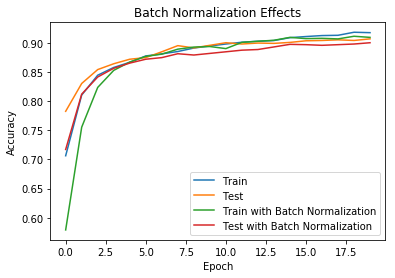

In [23]:
def compare_histories_acc(h1,h2):
  plt.plot(h1.history['acc'])
  plt.plot(h1.history['val_acc'])
  plt.plot(h2.history['acc'])
  plt.plot(h2.history['val_acc'])
  plt.title("Batch Normalization Effects")
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train', 'Test', 'Train with Batch Normalization', 'Test with Batch Normalization'], loc='best')
  plt.show()

history1 = normal_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=0)


history2 = batchnorm_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, verbose=0)

#compare_acc_histories passing in both model histories
compare_histories_acc(history1, history2)

The graph shows no improvements to the validation accuracy with the given hyperparameters in the models when using batch normalization for the relu output.

The plot suggests that we don't need to batch normalize the output of the hidden layer to increase the validation performance given our current architecture and hyperparameter settings. If this would be a deeper/complex model with more layers, I would still think about adding batch normalization to accelerate the training process (explanation above). 

### Final results: Interpreting Sigmoid Multi-Label Classification Output

By predicting the probabilities with sigmoid between 0 and 1 for each parcel, we can filter the  output with a desired threshold (default 0.5) that indicates if the parcel needs more water for a given sensor-array observation. After doing that we can round the output of sigmoid to 0 or 1 depending on if we are above or below the threshold. 

<img src="Data/sigmoid.png"/>

In [110]:
import numpy as np
np.set_printoptions(suppress=True)

small_y_test = y_test[:10].values #only 1 and 0 can be converted to int
small_x_test = X_test[:10].values

#predict on x_small_test
preds = normal_model.predict(small_x_test)
#print preds vs true values

print("{:34} | {}".format('Sigmoid Output','True labels')) 
for i,pred in enumerate(preds):
    print("{} | {}".format(pred,small_y_test[i]))
    
#rounds up => 5 and down <5
preds_rounded = np.round(preds)

print('\n')
print("{:25} | {}".format('Rounded sigmoid prediction', 'True labels'))
for i,pred_rounded in enumerate(preds_rounded):
    print("                {} |  {}".format(pred_rounded, small_y_test[i]))
#    
print('\n')    
print('Accuracy on sample: ',normal_model.evaluate(small_x_test, small_y_test)[1])    

Sigmoid Output                     | True labels
[0.9079424  0.66580707 0.315109  ] | [1 1 1]
[0.18170887 0.05527231 0.04101357] | [0 0 0]
[0.9565628  0.9870531  0.01071078] | [1 1 0]
[0.9434552  0.98009574 0.00141847] | [1 1 0]
[0.9993365  0.01380119 0.00558189] | [1 0 0]
[0.95412564 0.4319313  0.17638192] | [0 0 0]
[0.9548662  0.8033576  0.00419846] | [1 1 0]
[0.7215707  0.9971832  0.02686337] | [1 1 0]
[0.81680346 0.99484086 0.00107819] | [1 1 0]
[0.99545705 0.9911068  0.9739265 ] | [1 1 1]


Rounded sigmoid prediction | True labels
                [1. 1. 0.] |  [1 1 1]
                [0. 0. 0.] |  [0 0 0]
                [1. 1. 0.] |  [1 1 0]
                [1. 1. 0.] |  [1 1 0]
                [1. 0. 0.] |  [1 0 0]
                [1. 0. 0.] |  [0 0 0]
                [1. 1. 0.] |  [1 1 0]
                [1. 1. 0.] |  [1 1 0]
                [1. 1. 0.] |  [1 1 0]
                [1. 1. 1.] |  [1 1 1]


10/10 [==============================] - 0s 87us/step
Accuracy on sample:  0

As you can see it is really easy to interpret the results of a multi-label classification problem when using the sigmoid activation function! The model also managed to get a 93% accuracy on the small test sample.

## Conclusion

In this project, I managed to build an intelligent irrigation machine with around 90% Accuracy on unseen data. I used many different deep learning optimization methods on a simple neural network. It would have been better to optimize the different hyperparameters of the model simultaneously e.g. by transforming the model to a scikit- learn optimizer to utilize methods such as RandomSearchCV instead of doing every optimization process step by step. Different combinations of hyperparameters would lead to different performances. 

There are still a lot of things to test out on this model and I will keep updating it.

For example, I will check out if the following steps will improve the performance:

- Increase model capacity (Layers/Neurons)
- Transform Keras model to scikit-learn estimator to utilize Random/Grid-SearchCV to try out different combinations hyperparameters of (e.g. sgd/adam optimizer with different learning rates, different architectures, batch sizes)
- Long term: Would a CNN with real-time image classification perform better?